<a href="https://colab.research.google.com/github/ivelin/canswim/blob/main/canswim_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an experimental attempt to implement growth stock indicators in support of CANSLIM style investors and traders.

## Prepare Environment

Jupyter notebook housekeeping

In [2]:

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline


### Install local canswim package

In [3]:
# pip install -r requirements.txt
# !pip install -e ./

import sys
!{sys.executable} -m pip install -e ./


Obtaining file:///home/ivelin/canswim
  Preparing metadata (setup.py) ... done
  Attempting uninstall: canswim
    Found existing installation: canswim 0.0.1
    Uninstalling canswim-0.0.1:
      Successfully uninstalled canswim-0.0.1
  Running setup.py develop for canswim


## Prepare Model

### Load Data

In [4]:
from canswim.model import CanswimModel

canswim_model = CanswimModel()


n_test_range_days: 630
min_samples: 1890
Configuring CUDA GPU


In [5]:

# canswim_model.covariates.load_institutional_symbol_ownership()

In [6]:
# canswim_model.covariates.inst_symbol_ownership_df

In [7]:
# canswim_model.covariates.inst_symbol_ownership_df.dtypes

In [8]:
# list(canswim_model.covariates.inst_symbol_ownership_df.index.get_level_values(0).unique())

In [9]:
# canswim_model.load_data()

In [10]:
# canswim_model.prepare_data()

In [11]:
# iseries = canswim_model.covariates.prepare_institutional_symbol_ownership_series(stock_price_series=canswim_model.stock_price_series)

In [12]:
# key, value = list(iseries.items())[1]

In [13]:
# key

In [14]:
# value.pd_dataframe()

In [15]:
# value

In [16]:
# value.static_covariates_values()

In [17]:
# value.pd_dataframe().index.has_duplicates

In [18]:
# assert False

In [19]:

canswim_model.load_data()  


inst_symbol_ownership_df.columns Index(['symbol', 'date', 'cik', 'investorsHolding', 'lastInvestorsHolding',
       'investorsHoldingChange', 'numberOf13Fshares', 'lastNumberOf13Fshares',
       'numberOf13FsharesChange', 'totalInvested', 'lastTotalInvested',
       'totalInvestedChange', 'ownershipPercent', 'lastOwnershipPercent',
       'ownershipPercentChange', 'newPositions', 'lastNewPositions',
       'newPositionsChange', 'increasedPositions', 'lastIncreasedPositions',
       'increasedPositionsChange', 'closedPositions', 'lastClosedPositions',
       'closedPositionsChange', 'reducedPositions', 'lastReducedPositions',
       'reducedPositionsChange', 'totalCalls', 'lastTotalCalls',
       'totalCallsChange', 'totalPuts', 'lastTotalPuts', 'totalPutsChange',
       'putCallRatio', 'lastPutCallRatio', 'putCallRatioChange'],
      dtype='object')


In [20]:
# canswim_model.covariates.load_past_covariates()
# canswim_model.covariates.load_future_covariates()

### Prepare Data

In [21]:

def prepare_data():
    canswim_model.prepare_data()
    canswim_model.plot_splits()
    canswim_model.plot_seasonality()



n_stocks:  50
n_epochs:  10
Training loop stock subset: ['PSA', 'NVAX', 'SSP', 'ARWR', 'MOS', 'SPSC', 'RIOT', 'TYL', 'PFMT', 'WERN', 'AGO', 'EP', 'ALL', 'IGT', 'NTRS', 'TSLA', 'NJR', 'DD', 'EVA', 'EBAY', 'MACK', 'LC', 'VOXX', 'GLNG', 'PLAB', 'AWR', 'LGIH', 'DNOW', 'FDP', 'ENR', 'SCL', 'SAVA', 'ATXS', 'BKR', 'CCO', 'SFM', 'WAFD', 'TOL', 'MITK', 'TM', 'HPE', 'BBWI', 'TPB', 'TOWN', 'UHT', 'MATW', 'COFS', 'NWE', 'MLKN', 'CBAY']
Preparing ticker series for 50 stocks.
Ticker series dict created.
Filled missing values in ticker series.
Aligned ticker series dict with train start date.
Ticker series prepared.
Single target column selected: Close
Preparing univariate target series: Close
preparing model data
preparing past covariates
preparing past covariates: price and volume
preparing past covariates: earnings estimates 
stacking covariates
preparing past covariates: key metrics
stacking covariates
preparing past covariates: institutional ownership of symbol
stacking covariates
preparing past

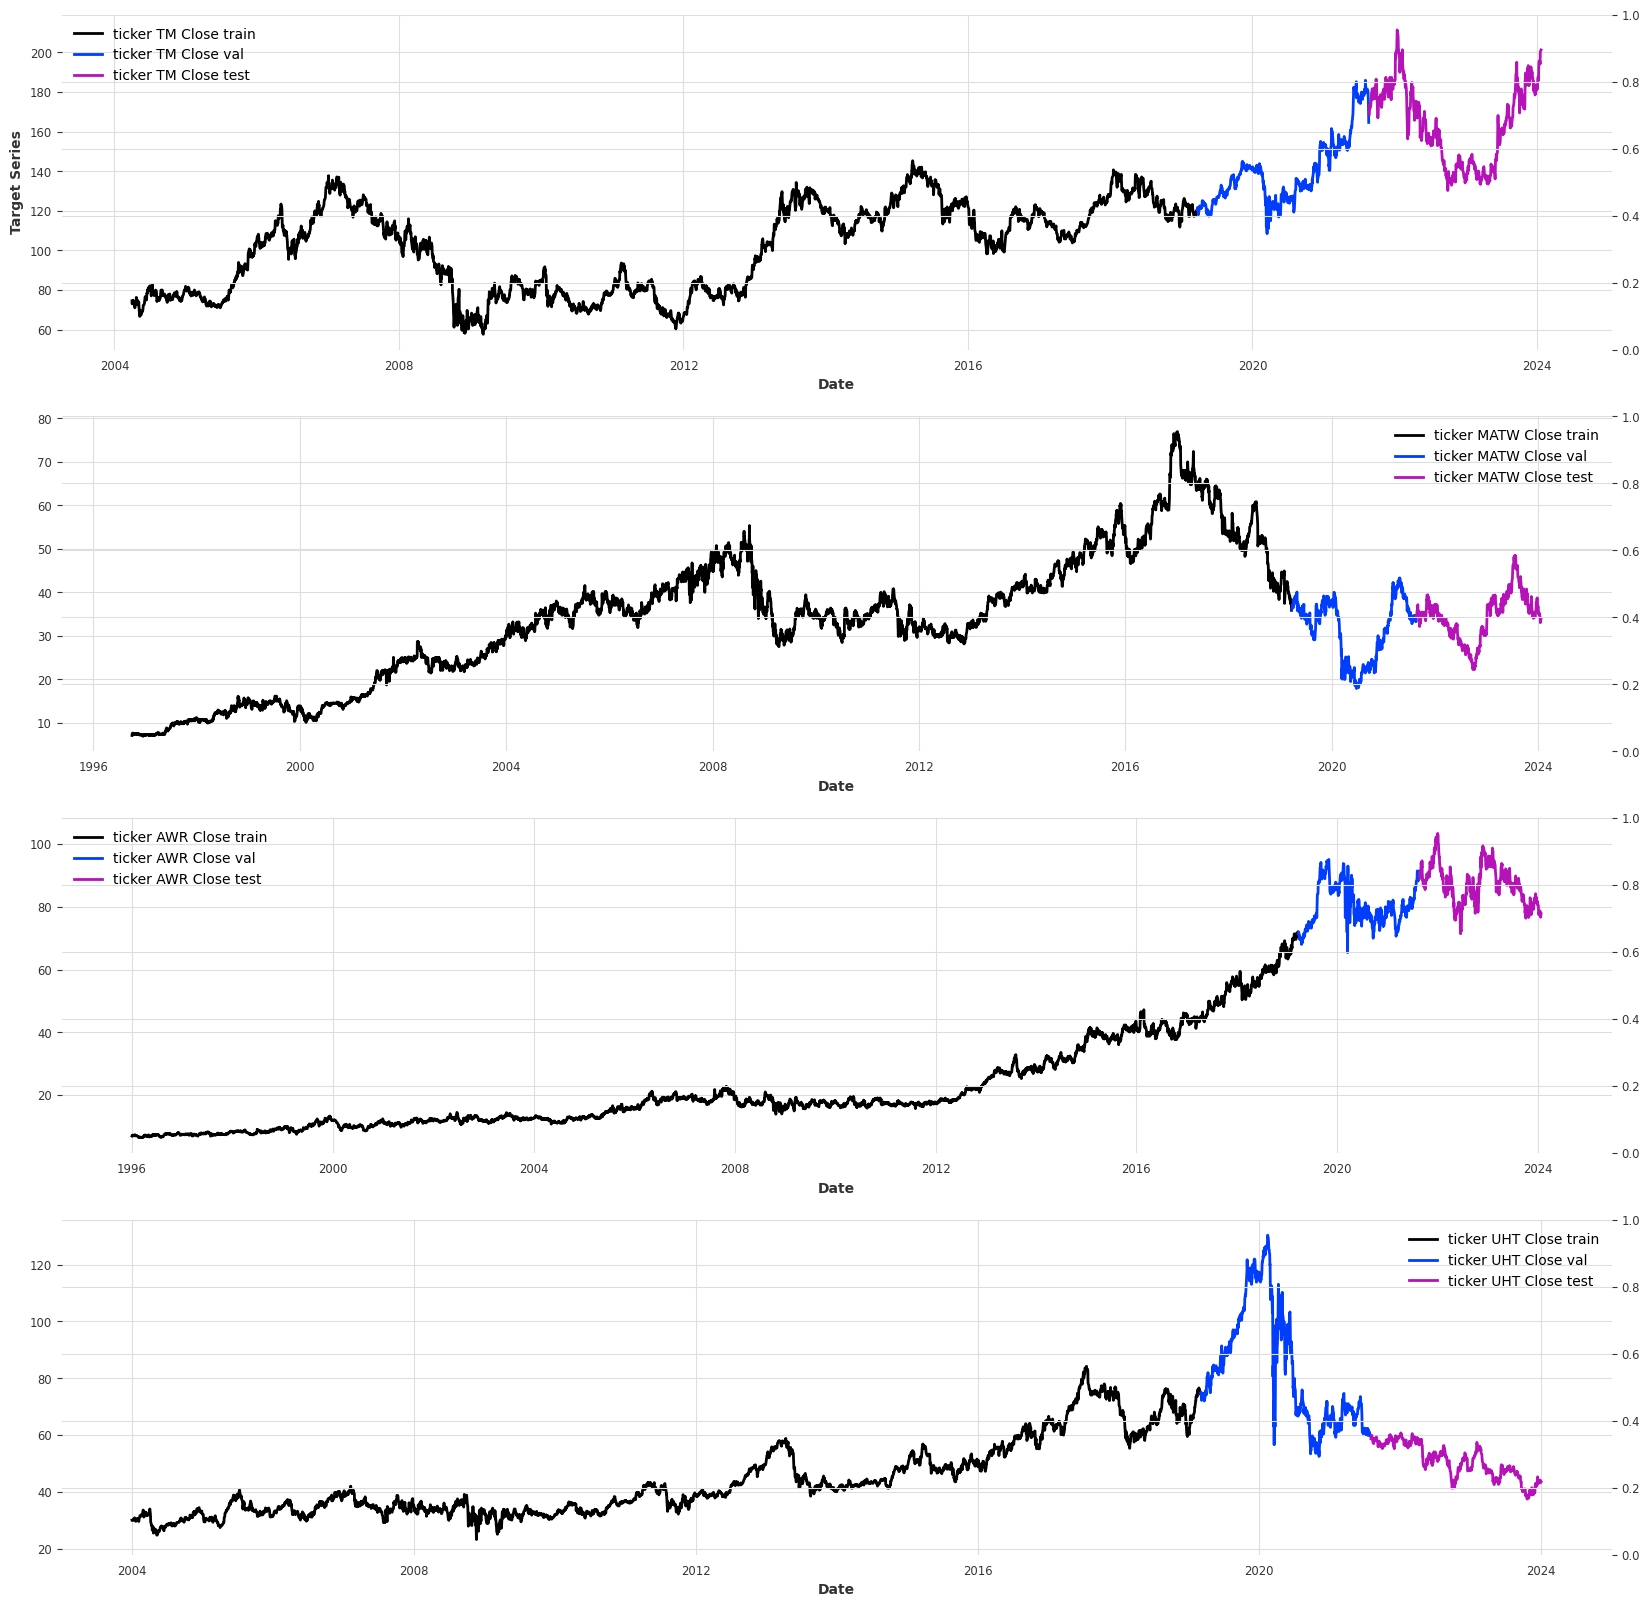

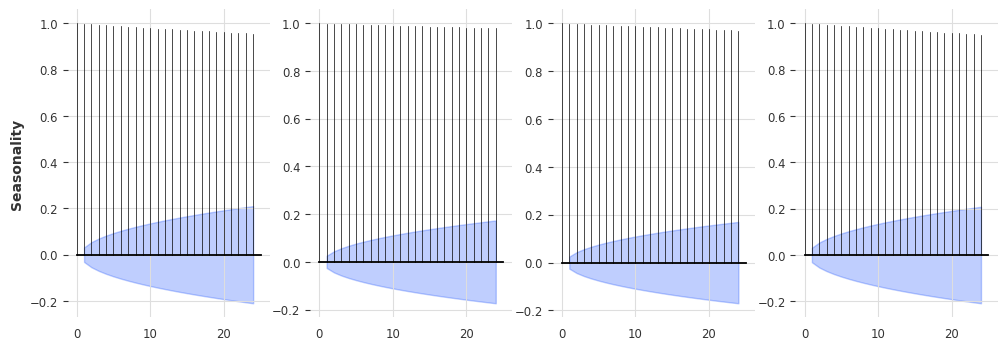

In [22]:
prepare_data()

In [23]:
canswim_model.stock_tickers

['PSA',
 'NVAX',
 'SSP',
 'ARWR',
 'MOS',
 'SPSC',
 'RIOT',
 'TYL',
 'PFMT',
 'WERN',
 'AGO',
 'EP',
 'ALL',
 'IGT',
 'NTRS',
 'TSLA',
 'NJR',
 'DD',
 'EVA',
 'EBAY',
 'MACK',
 'LC',
 'VOXX',
 'GLNG',
 'PLAB',
 'AWR',
 'LGIH',
 'DNOW',
 'FDP',
 'ENR',
 'SCL',
 'SAVA',
 'ATXS',
 'BKR',
 'CCO',
 'SFM',
 'WAFD',
 'TOL',
 'MITK',
 'TM',
 'HPE',
 'BBWI',
 'TPB',
 'TOWN',
 'UHT',
 'MATW',
 'COFS',
 'NWE',
 'MLKN',
 'CBAY']

In [24]:
t = list(canswim_model.targets.target_series.keys())[0]
t

'TM'

In [25]:
canswim_model.target_train_list[0].pd_dataframe()

component,Close
Date,
2004-12-31,19.670000
2005-01-03,19.610001
2005-01-04,19.549999
2005-01-05,19.450001
2005-01-06,19.299999
...,...
2019-03-18,45.150002
2019-03-19,44.930000
2019-03-20,44.840000


In [26]:
future_covs = canswim_model.future_cov_list[0].pd_dataframe().tail(500)
past_covs = canswim_model.future_cov_list[0].pd_dataframe().tail(500)

In [ ]:
future_covs

In [ ]:
past_covs

In [27]:
len(canswim_model.targets_list)

40

In [28]:
len(canswim_model.target_train_list)

40

In [29]:
len(canswim_model.past_cov_list)

40

In [30]:
len(canswim_model.future_cov_list)

40

## Find optimal hyper parameters

In [31]:
canswim_model.find_model()


[I 2024-01-30 10:03:19,905] A new study created in memory with name: no-name-62b165f5-1d3c-4d00-a3b7-24fe76040ba9


  0%|          | 0/100 [00:00<?, ?it/s]

Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 91.8 K
5 | future_cov_projection | _ResidualBlock   | 80.5 K
6 | encoders              | Sequential       | 5.9 M 
7 | decoders              | Sequential       | 9.1 M 
8 | temporal_decoder      | _ResidualBlock   | 12.8 K
9 | lookback_skip         | Linear           | 123 K 
-----------------------------------------------------------
15.3 M    Trainable params
0         Non-trainable params
15.3 M    Total params
61.154    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 15.146


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 1.840 >= min_delta = 0.001. New best score: 13.306


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.733 >= min_delta = 0.001. New best score: 12.572


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.476 >= min_delta = 0.001. New best score: 12.097


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 12.097. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(40) and preds(40)


  0%|          | 0/40 [00:00<?, ?it/s]

Trial concluded with Loss: 1.709655878991083 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x79c3aed29010>
[I 2024-01-30 10:57:17,612] Trial 0 finished with value: 1.709655878991083 and parameters: {'input_chunk_length': 420, 'output_chunk_length': 42, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 24, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 1.9399461441420344e-05}. Best is trial 0 with value: 1.709655878991083.
Current value: 1.709655878991083, Current params: {'input_chunk_length': 420, 'output_chunk_length': 42, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 24, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 1.9399461441420344e-05}
Best value: 1.709655878991083, Best params: {'input_chunk_length': 420, 'output_chunk_length': 42, '

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 91.8 K
5 | future_cov_projection | _ResidualBlock   | 80.5 K
6 | encoders              | Sequential       | 4.3 M 
7 | decoders              | Sequential       | 9.1 M 
8 | temporal_decoder      | _ResidualBlock   | 18.5 K
9 | lookback_skip         | Linear           | 74.4 K
-----------------------------------------------------------
13.7 M    Trainable params
0         Non-trainable params
13.7 M    Total params
54.786    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 12.286


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 1.077 >= min_delta = 0.001. New best score: 11.209


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.377 >= min_delta = 0.001. New best score: 10.832


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 10.832. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(40) and preds(40)


  0%|          | 0/40 [00:00<?, ?it/s]

Trial concluded with Loss: 1.6144289771445401 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x79c3ac2c1150>
[I 2024-01-30 11:26:04,363] Trial 1 finished with value: 1.6144289771445401 and parameters: {'input_chunk_length': 252, 'output_chunk_length': 42, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 24, 'temporal_decoder_hidden': 96, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.3864805045789e-05}. Best is trial 1 with value: 1.6144289771445401.
Current value: 1.6144289771445401, Current params: {'input_chunk_length': 252, 'output_chunk_length': 42, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 24, 'temporal_decoder_hidden': 96, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.3864805045789e-05}
Best value: 1.6144289771445401, Best params: {'input_chunk_length': 252, 'output_chunk_length': 42, 'h

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 91.8 K
5 | future_cov_projection | _ResidualBlock   | 80.5 K
6 | encoders              | Sequential       | 4.7 M 
7 | decoders              | Sequential       | 4.3 M 
8 | temporal_decoder      | _ResidualBlock   | 5.9 K 
9 | lookback_skip         | Linear           | 86.7 K
-----------------------------------------------------------
9.2 M     Trainable params
0         Non-trainable params
9.2 M     Total params
36.991    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 11.632


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 1.070 >= min_delta = 0.001. New best score: 10.562


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.058 >= min_delta = 0.001. New best score: 10.504


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 10.504. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(40) and preds(40)


  0%|          | 0/40 [00:00<?, ?it/s]

Trial concluded with Loss: 1.776015996267527 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x79c3adb31f50>
[I 2024-01-30 12:00:35,777] Trial 2 finished with value: 1.776015996267527 and parameters: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 80, 'dropout': 0.3, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 4.345907242076314e-05}. Best is trial 1 with value: 1.6144289771445401.
Current value: 1.776015996267527, Current params: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 80, 'dropout': 0.3, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 4.345907242076314e-05}
Best value: 1.6144289771445401, Best params: {'input_chunk_length': 252, 'output_chunk_length': 42, 'hi

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 365 K 
5 | future_cov_projection | _ResidualBlock   | 320 K 
6 | encoders              | Sequential       | 40.9 M
7 | decoders              | Sequential       | 39.0 M
8 | temporal_decoder      | _ResidualBlock   | 3.7 K 
9 | lookback_skip         | Linear           | 86.7 K
-----------------------------------------------------------
80.7 M    Trainable params
0         Non-trainable params
80.7 M    Total params
322.875   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 12.573


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.823 >= min_delta = 0.001. New best score: 11.750


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 0.273 >= min_delta = 0.001. New best score: 11.478


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 11.478. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(40) and preds(40)


  0%|          | 0/40 [00:00<?, ?it/s]

Trial concluded with Loss: 1.657547635205346 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x79c3aecae8d0>
[I 2024-01-30 14:11:22,651] Trial 3 finished with value: 1.657547635205346 and parameters: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 2048, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.165136253676642e-05}. Best is trial 1 with value: 1.6144289771445401.
Current value: 1.657547635205346, Current params: {'input_chunk_length': 294, 'output_chunk_length': 42, 'hidden_size': 2048, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 48, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.165136253676642e-05}
Best value: 1.6144289771445401, Best params: {'input_chunk_length': 252, 'output_chunk_length': 42, '

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 91.8 K
5 | future_cov_projection | _ResidualBlock   | 80.5 K
6 | encoders              | Sequential       | 6.3 M 
7 | decoders              | Sequential       | 4.3 M 
8 | temporal_decoder      | _ResidualBlock   | 8.1 K 
9 | lookback_skip         | Linear           | 136 K 
-----------------------------------------------------------
10.8 M    Trainable params
0         Non-trainable params
10.8 M    Total params
43.390    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 11.744


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 11.744. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(40) and preds(40)


  0%|          | 0/40 [00:00<?, ?it/s]

Trial concluded with Loss: 1.748868836154997 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x79c3adb661d0>
[I 2024-01-30 14:40:20,091] Trial 4 finished with value: 1.748868836154997 and parameters: {'input_chunk_length': 462, 'output_chunk_length': 42, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 112, 'dropout': 0.3, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0003190393405386899}. Best is trial 1 with value: 1.6144289771445401.
Current value: 1.748868836154997, Current params: {'input_chunk_length': 462, 'output_chunk_length': 42, 'hidden_size': 512, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 112, 'dropout': 0.3, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0003190393405386899}
Best value: 1.6144289771445401, Best params: {'input_chunk_length': 252, 'output_chunk_length': 42, '

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 274 K 
5 | future_cov_projection | _ResidualBlock   | 240 K 
6 | encoders              | Sequential       | 24.0 M
7 | decoders              | Sequential       | 23.8 M
8 | temporal_decoder      | _ResidualBlock   | 4.8 K 
9 | lookback_skip         | Linear           | 74.4 K
-----------------------------------------------------------
48.4 M    Trainable params
0         Non-trainable params
48.4 M    Total params
193.527   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 12.194


Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved by 1.012 >= min_delta = 0.001. New best score: 11.182


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 11.182. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(40) and preds(40)


  0%|          | 0/40 [00:00<?, ?it/s]

Trial concluded with Loss: 1.5559658676999373 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x79c3ad83a890>
[I 2024-01-30 15:43:49,190] Trial 5 finished with value: 1.5559658676999373 and parameters: {'input_chunk_length': 252, 'output_chunk_length': 42, 'hidden_size': 1536, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.516925478836828e-05}. Best is trial 5 with value: 1.5559658676999373.
Current value: 1.5559658676999373, Current params: {'input_chunk_length': 252, 'output_chunk_length': 42, 'hidden_size': 1536, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.516925478836828e-05}
Best value: 1.5559658676999373, Best params: {'input_chunk_length': 252, 'output_chunk_length': 42

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 274 K 
5 | future_cov_projection | _ResidualBlock   | 240 K 
6 | encoders              | Sequential       | 27.5 M
7 | decoders              | Sequential       | 38.2 M
8 | temporal_decoder      | _ResidualBlock   | 18.5 K
9 | lookback_skip         | Linear           | 111 K 
-----------------------------------------------------------
66.4 M    Trainable params
0         Non-trainable params
66.4 M    Total params
265.543   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 11.492


Validation: |          | 0/? [00:00<?, ?it/s]

[I 2024-01-30 16:20:31,563] Trial 6 pruned. Trial was pruned at epoch 1.
Current value: 12.16092850327671, Current params: {'input_chunk_length': 378, 'output_chunk_length': 42, 'hidden_size': 1536, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 24, 'temporal_decoder_hidden': 96, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 6.945663051270969e-05}
Best value: 1.5559658676999373, Best params: {'input_chunk_length': 252, 'output_chunk_length': 42, 'hidden_size': 1536, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 3.516925478836828e-05}
Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 365 K 
5 | future_cov_projection | _ResidualBlock   | 320 K 
6 | encoders              | Sequential       | 42.5 M
7 | decoders              | Sequential       | 39.0 M
8 | temporal_decoder      | _ResidualBlock   | 4.8 K 
9 | lookback_skip         | Linear           | 99.1 K
-----------------------------------------------------------
82.3 M    Trainable params
0         Non-trainable params
82.3 M    Total params
329.122   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 9.430


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Monitored metric val_loss did not improve in the last 3 records. Best score: 9.430. Signaling Trainer to stop.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Calculating loss for target_list(40) and preds(40)


  0%|          | 0/40 [00:00<?, ?it/s]

Trial concluded with Loss: 1.7252982696956831 of model search. Trial instance: <optuna.trial._trial.Trial object at 0x79c3aece6410>
[I 2024-01-30 17:47:47,196] Trial 7 finished with value: 1.7252982696956831 and parameters: {'input_chunk_length': 336, 'output_chunk_length': 42, 'hidden_size': 2048, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0006051559816302807}. Best is trial 5 with value: 1.5559658676999373.
Current value: 1.7252982696956831, Current params: {'input_chunk_length': 336, 'output_chunk_length': 42, 'hidden_size': 2048, 'num_encoder_layers': 3, 'num_decoder_layers': 3, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 64, 'dropout': 0.2, 'use_layer_norm': True, 'use_reversible_instance_norm': True, 'lr': 0.0006051559816302807}
Best value: 1.5559658676999373, Best params: {'input_chunk_length': 252, 'output_chunk_length': 42

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | rin                   | RINorm           | 2     
4 | past_cov_projection   | _ResidualBlock   | 91.8 K
5 | future_cov_projection | _ResidualBlock   | 80.5 K
6 | encoders              | Sequential       | 6.7 M 
7 | decoders              | Sequential       | 9.1 M 
8 | temporal_decoder      | _ResidualBlock   | 12.8 K
9 | lookback_skip         | Linear           | 148 K 
-----------------------------------------------------------
16.1 M    Trainable params
0         Non-trainable params
16.1 M    Total params
64.349    

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Metric val_loss improved. New best score: 10.901


In [ ]:
len(canswim_model.targets_list)

In [ ]:
len(canswim_model.target_train_list)

In [ ]:
len(canswim_model.past_cov_list)

In [ ]:
len(canswim_model.future_cov_list)

In [ ]:
from darts.models import TiDEModel

model = TiDEModel.load_from_checkpoint(canswim_model.model_name)


In [ ]:
canswim_model.load_model()


In [ ]:
preds = model.predict(
    n=model.output_chunk_length,
    series=canswim_model.target_train_list,
    mc_dropout=True,
    num_samples=500,
    past_covariates=canswim_model.past_cov_list,
    future_covariates=canswim_model.future_cov_list,
    num_loader_workers=4,
)

In [ ]:
preds[0]

In [ ]:
len(preds)

In [ ]:
from darts.metrics import quantile_loss

loss = quantile_loss(canswim_model.targets_list, preds, n_jobs=-1, verbose=True)


In [ ]:
import numpy as np
loss_val = np.mean(loss)
loss_val  

In [ ]:
canswim_model.test()
canswim_model.plot_test_results()    


In [ ]:
len(canswim_model.targets_list)

In [ ]:
# thorough backtest of model checkpoint
start_list = canswim_model.get_val_start_list()
backtest, test_error = canswim_model.backtest(series=canswim_model.targets_list[0], start=start_list[0],
                                              past_covariates=canswim_model.past_cov_list[0], future_covariates=canswim_model.future_cov_list[0],
                                              forecast_horizon=canswim_model.pred_horizon)        
print(f"Backtest Quantile Loss = {test_error}")


In [ ]:
canswim_model.plot_backtest_results(target=canswim_model.targets_list[0], backtest=backtest, start=start_list[0], forecast_horizon=canswim_model.pred_horizon)    

In [ ]:
assert False

In [ ]:
# if a model has not been selected and saved yet
# run a hyper parameter search
# otherwise load saved model and continue training
if not canswim_model.load_model():
    # find and save the optimal model configuration
    canswim_model.find_model()

## Train model

### Run model training loop

In [ ]:

# train loop
for i in range(10):
    # align all data series for training
    canswim_model.train()
    # save model checkpoint
    canswim_model.save()
    # quick test progress at modelcheckpoing
    canswim_model.test()
    canswim_model.plot_test_results()    
    # thorough backtest of model checkpoint
    backtest, test_error = canswim_model.backtest()        
    print(f"Backtest Quantile Loss = {test_error}")
    canswim_model.plot_backtest_results(backtest)    
    # prepare next sample subset
    prepare_data()
 